In [5]:
!pip install tensorflow opencv-python matplotlib

In [6]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data 

In [7]:
import tensorflow as tf
import os

In [8]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 999 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
batch[1]

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

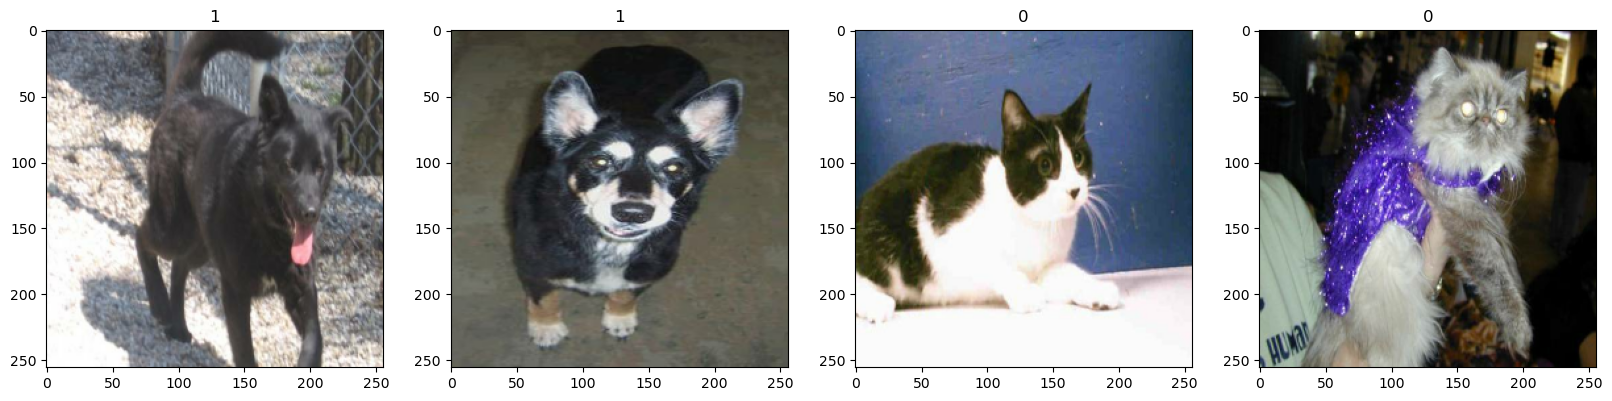

In [14]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#0 is for cat, 1 is for dog
    

In [15]:
data = data.map(lambda x,y: (x/255,y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

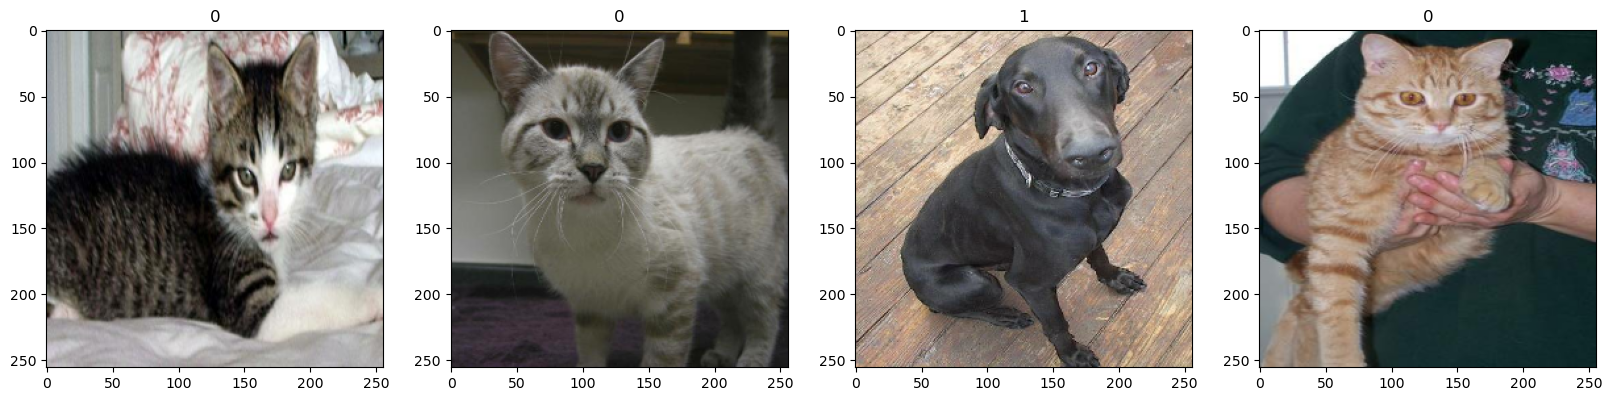

In [18]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    #0 is for cat, 1 is for dog

In [19]:
len(data)

32

In [20]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.1)+1
validate_size = int(len(data)*.2)


In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(validate_size)
test = data.skip(train_size + validate_size).take(test_size)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
        


In [35]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
logdir= 'logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [39]:
his = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.4748 - loss: 1.0192 - val_accuracy: 0.5469 - val_loss: 0.6755
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.5762 - loss: 0.6762 - val_accuracy: 0.4844 - val_loss: 0.6978
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.5603 - loss: 0.6793 - val_accuracy: 0.6771 - val_loss: 0.6563
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.5725 - loss: 0.6518 - val_accuracy: 0.6823 - val_loss: 0.6153
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - accuracy: 0.6836 - loss: 0.5959 - val_accuracy: 0.7448 - val_loss: 0.5357
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.7515 - loss: 0.5259 - val_accuracy: 0.7708 - val_loss: 0.5257
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - accuracy: 0.7911 - loss: 0.4416 - val_accuracy: 0.8021 - val_loss: 0.4637
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.8455 - loss: 0.3568 - val_accuracy: 0

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    rec.update_state(y,yhat)
    acc.update_state(y,yhat)
    
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [45]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9259259104728699, Recall:0.9433962106704712, Accuracy:0.9320388436317444
